In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bones import Model
import torch
import torch.nn as nn
from torch import optim
import pandas as pd
import pickle

# Purpose
This module is designed to quickly set up and optimize a supervised neural network using 1d or 2d data with 1 truth value for each data entry. Here I will demonstrate how to use the network and show that it works on 1d and 2d data.

## Intializing the model
### import as Model and init with Model(*args)
#### Args:
      
      - lins: (list of integers) the widths of the linear layers
      - activation: the activation function to be applied after each linear layer. You can create your own (using pytorch rules) or use a pytorch one
      - optimizer: a pytorch optimizer
      - batch_size: (int) number of samples to be trained on at a time
      - init_lr: (float) initial learning rate (can be decayed with lr_decay kwarg)
      - data: (array) can be 1d or 2d data. Data should be stacked along dim = 0. i.e. if you have 20 images size 3x3, your array should have shape (20, 3, 3). It will be split into train/test automatically.
      -truth: (array) 1d array containing truth values
      - cost: cost function

## Import some sample data, in this case various qualities of wine as data and their ratings as truth

In [3]:
wines = pd.read_csv('winequality-red.csv').to_numpy()
truth = wines[:, -1]
data = wines[:, :-1]

In [4]:
## Example using only necessary arguments
lins = [1000, 100, 10, 10, 4]
activation = nn.PReLU
optimizer = optim.SGD
batch_size = 128
init_lr = 5e-4
#data and truth loaded in the previous cell
cost = nn.MSELoss()


model = Model(lins, activation, optimizer, batch_size, init_lr, data, truth, cost )

Not saving


## Once the model is loaded, we can print it's parameters using model.params()
I will explain what all the parameters mean in due time

In [5]:
model.params()

,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
5,[],[],False,"[1000, 100, 10, 10, 4, 1]",PReLU(num_parameters=1),1279,0.0005,0,128,0,0,0.0


## Run it using model.run()
It is automatically set to print the loss every epoch and plot train/test vs truth every 3 epochs, but we can adjust that.
The default stopping point is 100 epochs, but we can change that as well.

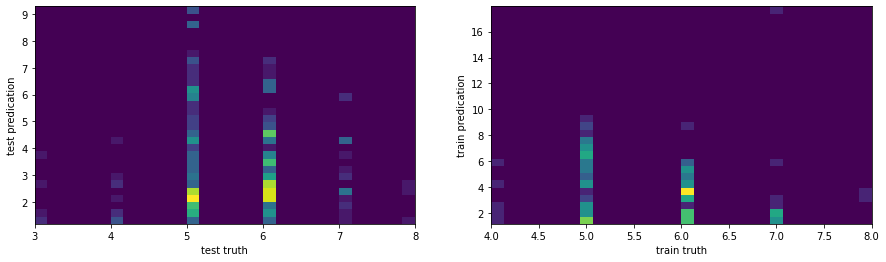

Epoch number 0
 Current loss 8.018027418291563

Epoch number 1
 Current loss 6.36452414707251

Epoch number 2
 Current loss 5.146737578366495



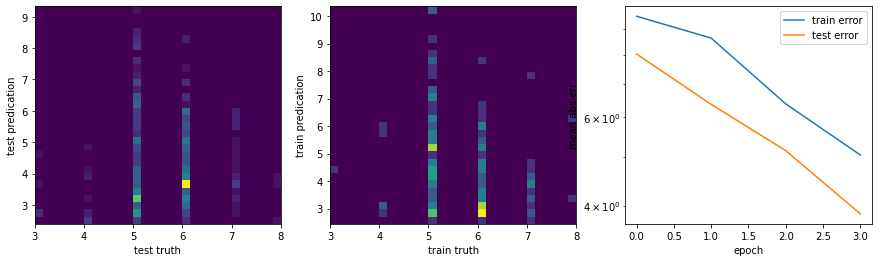

Epoch number 3
 Current loss 3.850747458021476

Epoch number 4
 Current loss 2.3956271485469296

Epoch number 5
 Current loss 1.3799462742014075



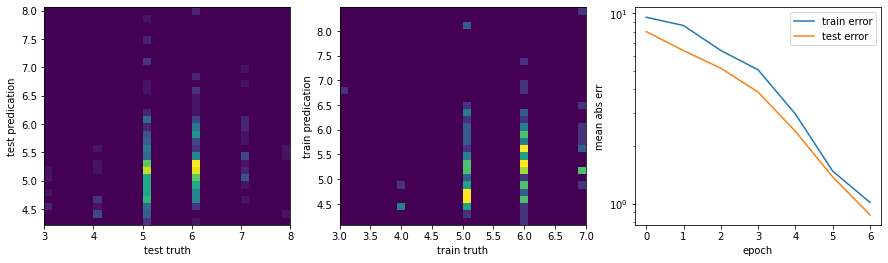

Epoch number 6
 Current loss 0.8712645100680307

Epoch number 7
 Current loss 1.8528440970446654

Epoch number 8
 Current loss 0.6468499529871815



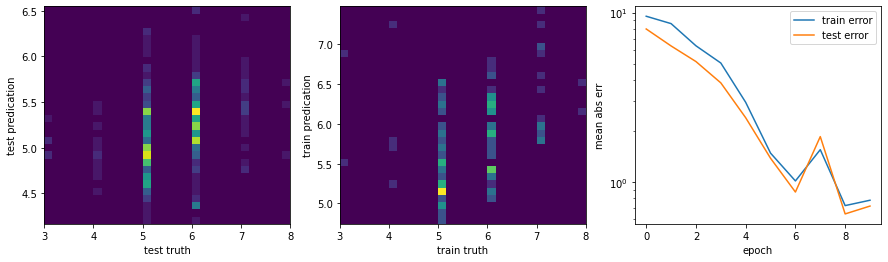

Epoch number 9
 Current loss 0.7198056552060772



In [6]:
model.run()

## if you run this again without re-initializing the model, it will pick up where you left off

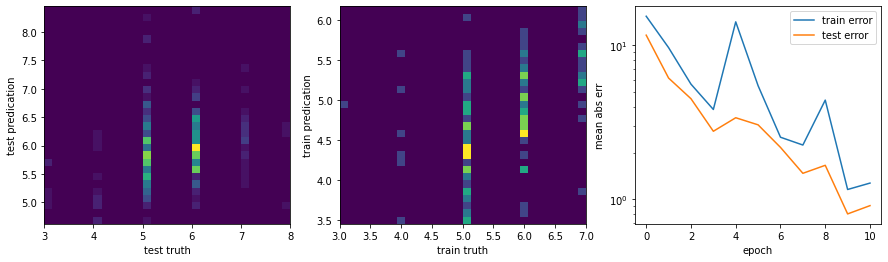

Epoch number 10
 Current loss 0.911238547181296

Epoch number 11
 Current loss 0.856831371830034

Epoch number 12
 Current loss 0.7952881113044018



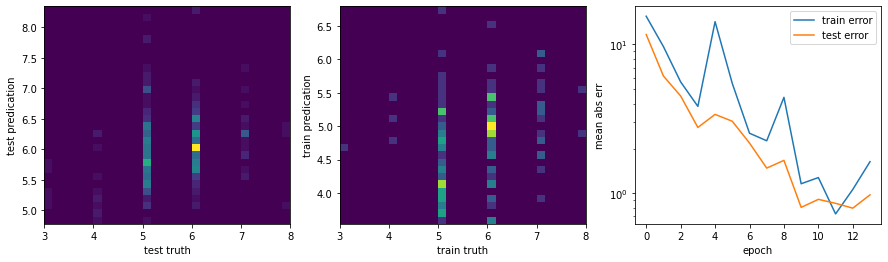

Epoch number 13
 Current loss 0.9771340358165588

Epoch number 14
 Current loss 0.7839003737637456

Epoch number 15
 Current loss 1.1312543097614105



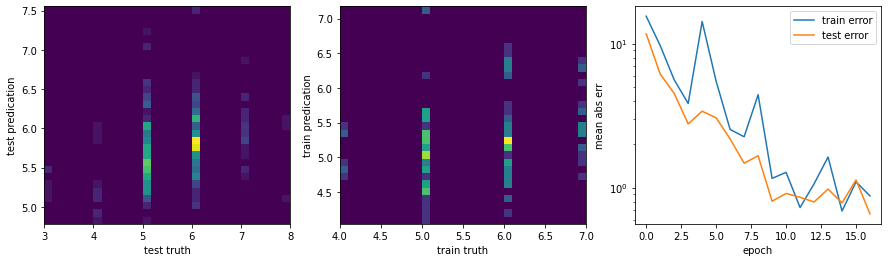

Epoch number 16
 Current loss 0.6572129469210173

Epoch number 17
 Current loss 0.5624713952307134

Epoch number 18
 Current loss 0.5960283103912585



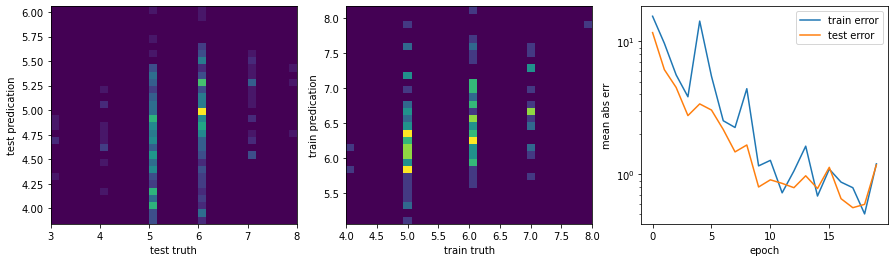

Epoch number 19
 Current loss 1.1794111911917007



In [15]:
model.run()

## params will update with each epoch. You can see that err (average value of the cost function) and derr (the difference between the last and second to last loss value) now have values

In [16]:
model.params()

,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
3,[],[],False,"[1000, 100, 10, 10, 1]",ReLU(),1279,0.0005,0,128,40,-0.583,1.18


## Now let's talk kwargs (optional arguments)

### For 2d data (images) you can do convolutions.
    - csizes: (list, default []) sizes of the convolution matrices
    - convs: (list, default []) widths of the convolution layers
    - (both convs and csizes must be included to do convolutions)
    -resnet: (bool, default False) if you want to use a residual network, set resnet = True (https://arxiv.org/abs/1512.03385)

### so let's load some 2d data-- the fashion MNIST set in this case, which classifies images of clothing into 10 categories.

In [17]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
data = np.vstack((train_images, test_images))[:10000]
truth = np.append(train_labels, test_labels)[:10000]
#I've cut off the data at 10,000 samples

### note that the same model works with 1 and 2d data. I chose to make adjustments so that the model is more suitable for the data, but it would run with no changes

In [24]:
activation = nn.Sigmoid()
optimizer = optim.SGD
init_lr = 1e-4
lins = [1000, 100, 100, 100]
model = Model(lins, activation, optimizer, batch_size, init_lr, data, truth, cost,
             convs = [2, 2,], csizes = [3, 3,])
model.params()

Not saving


,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
3,"[2, 2]","[3, 3]",False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.0001,0,128,0,0,0.0


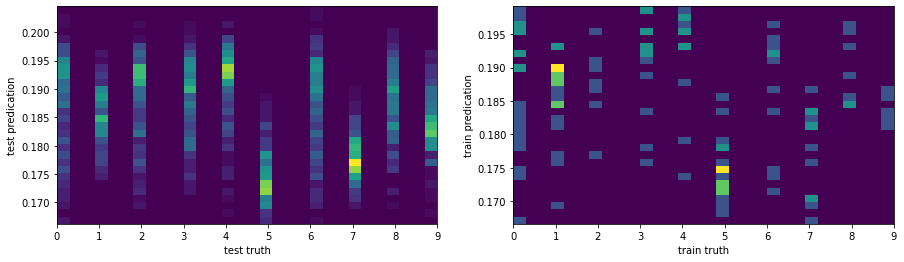

Epoch number 0
 Current loss 27.126193708843495

Epoch number 1
 Current loss 26.23913542574689

Epoch number 2
 Current loss 25.159751050431645



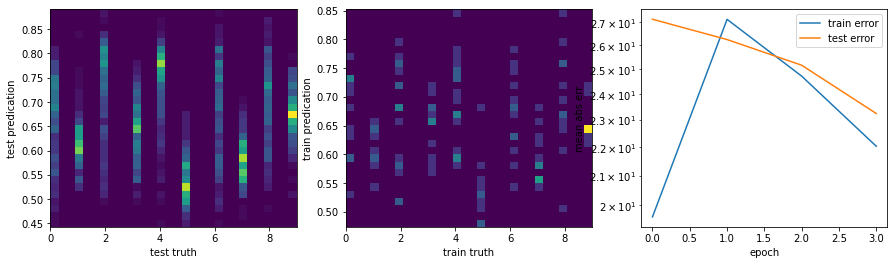

Epoch number 3
 Current loss 23.246607690535658

Epoch number 4
 Current loss 16.849530921622485



In [25]:
model.run(max_epochs = 5)

### You can make the learning rate dynamics
#### And adjust it as a kwarg in model.run()
    - lr_decay: (float, default 1) learning rate decay factor. ex. if init_lr = .7 and lr_decay = .5, after 1 update the  learning rate will be lr = .7*.5. 
    -lr_min: (float, default 1e-8) minimum learning rate applied when decaying (generally a good idea to put in ~.95)

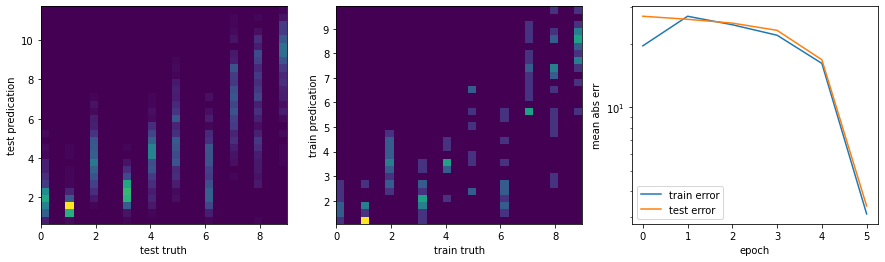

Epoch number 5
 Current loss 3.4006822051415293

Epoch number 6
 Current loss 3.1687016710164464

Epoch number 7
 Current loss 3.0179730580619126



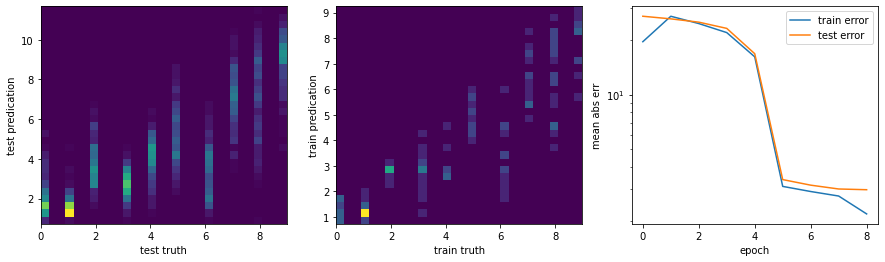

Epoch number 8
 Current loss 2.990224351180247

Epoch number 9
 Current loss 3.5017981001735414

Epoch number 10
 Current loss 2.880094860051322



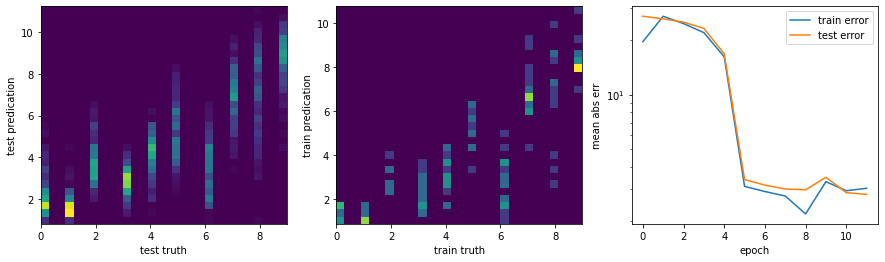

Epoch number 11
 Current loss 2.819571082046601

Epoch number 12
 Current loss 2.715662679026111

Epoch number 13
 Current loss 2.8630733706643534



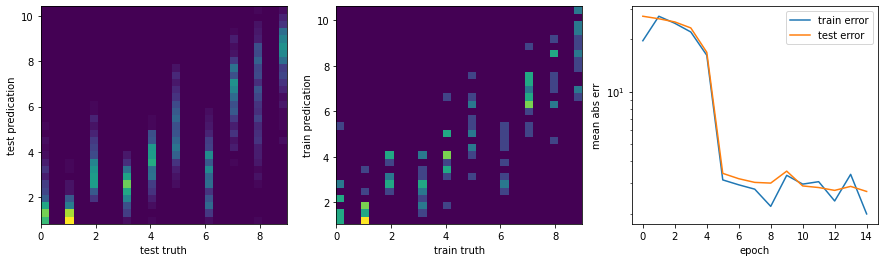

Epoch number 14
 Current loss 2.677681966008305



In [26]:
model.run( lr = 1e-3, lr_decay = .95, lr_min = 1e-8, max_epochs = 10)

### Saving
    One of the key elements of this system is that you can save past runs and compare their outcomes. When you start a new run, if you use the same convolution and linear layers and activation function from a previous run you will get a warning telling you which run number it was and the parameters of that run. You can also load past runs a continue running them with the option to not save, save and update the loaded file, or save in a new location.
    -saving: (bool, default False) If you want to save, set to true
    - run_num: (int, default None) set to the number of a past run to load it and pick up where it left off
    -new_tar: (bool, default False) set to True if you would like to load an old run (using run_num) but save the new results in a new file
    
    Please do not attempt to save results from different data together
    
    Let's try turning on saving. I will get a warning alerting me that another run used the same parameters.

In [32]:
init_lr = 1e-4
model = Model(lins, activation, optimizer, batch_size, init_lr, data, truth, cost,
             max_epochs = 20, lr_decay = .9, saving = True)
model.params()

,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
2,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.000006,0,128,48,0.015,3.01


,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
3,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.00059,0,128,19,0.0,28.77


/mnt/c/Users/olivi/Code/Pytorch Template/bones.py:258: UserWarning: Run(s) [2. 3.] used the same hyper parameters
  warnings.warn('Run(s) '+ str(same) + ' used the same hyper parameters')


,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
4,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.0001,0,128,0,0,0.0


## I will now let it run for a few epochs, re-initialize the model and load the weights from the previous run.

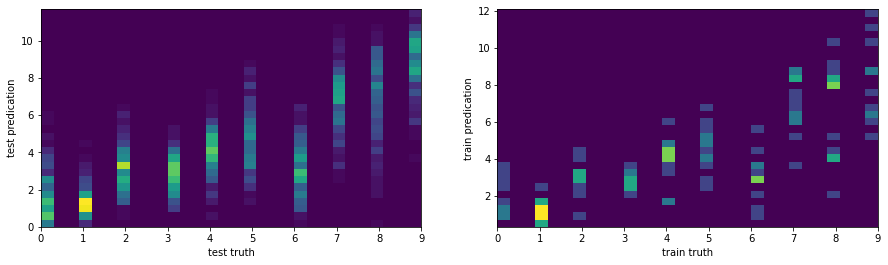

Epoch number 0
 Current loss 3.235438171228902

Epoch number 1
 Current loss 2.983217573648608

Epoch number 2
 Current loss 2.9838438885024456



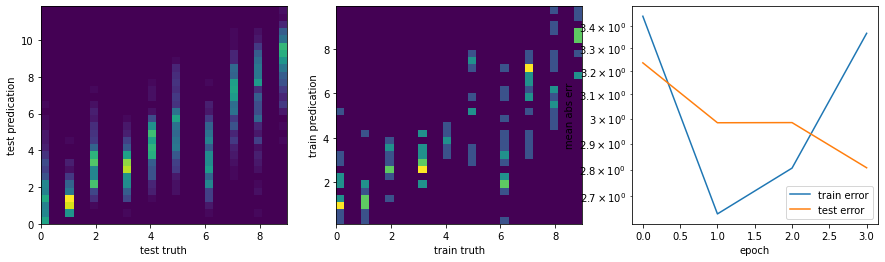

Epoch number 3
 Current loss 2.806733433977349

Epoch number 4
 Current loss 2.7011847156462037



In [33]:
model.run(max_epochs = 5)

In [34]:
model = Model(lins, activation, optimizer, batch_size, init_lr, data, truth, cost,
             max_epochs = 20, saving = True, run_num = 2)
model.params()

,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
3,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.00059,0,128,19,0.0,28.77


,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
4,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.000059,0,128,9,0.106,2.7


Weights from run  2  loaded.


/mnt/c/Users/olivi/Code/Pytorch Template/bones.py:258: UserWarning: Run(s) [3.0, 4.0] used the same hyper parameters
  warnings.warn('Run(s) '+ str(same) + ' used the same hyper parameters')


,convolution layer sizes,convolution matrix sizes,ResNet,linear layer sizes,activation,training sample size,learning rate,Dropout,batch size,epochs,derr,err
2,[],[],False,"[1000, 100, 100, 100, 1]",ReLU(),8000,0.000006,0,128,48,0,3.01


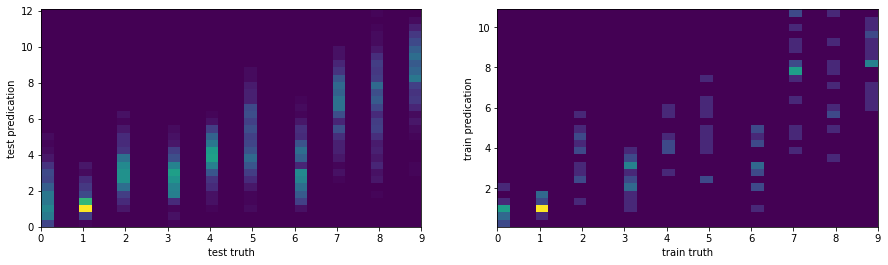

Epoch number 48
 Current loss 2.99173920250878

Epoch number 49
 Current loss 2.9763590891253267

Epoch number 50
 Current loss 2.966471100714499



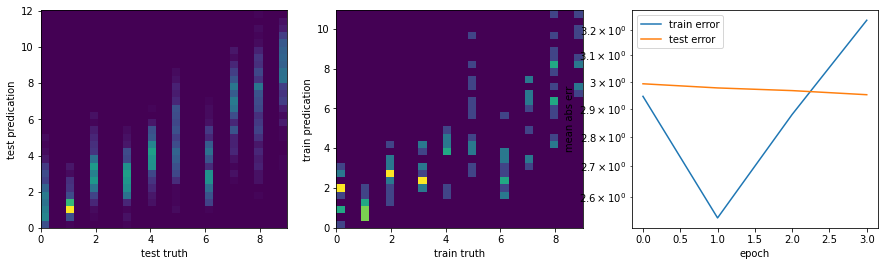

Epoch number 51
 Current loss 2.951380322841293

Epoch number 52
 Current loss 2.9337909151962616

Epoch number 53
 Current loss 2.923635898242775



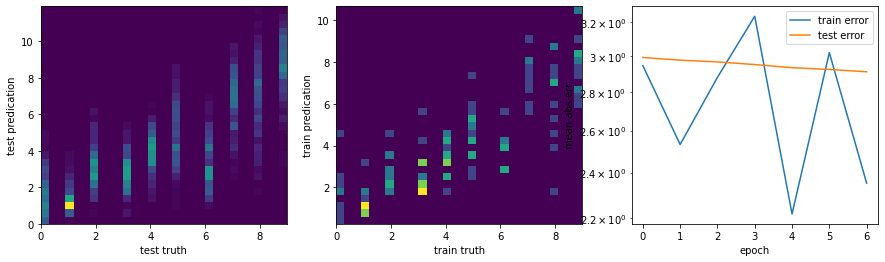

Epoch number 54
 Current loss 2.910885197813607

Epoch number 55
 Current loss 2.8982459156919287

Epoch number 56
 Current loss 2.887080142924791



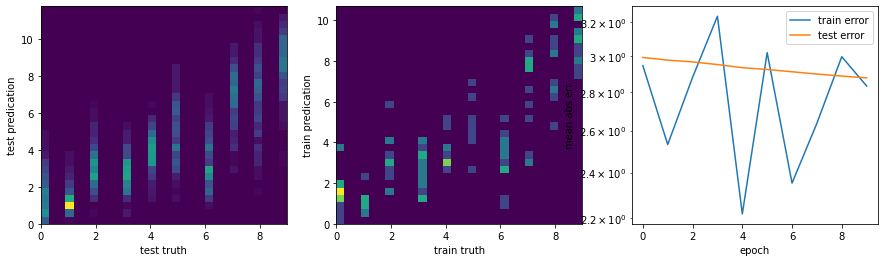

Epoch number 57
 Current loss 2.876906178049232

Epoch number 58
 Current loss 2.8739343213485924

Epoch number 59
 Current loss 2.856191761264587



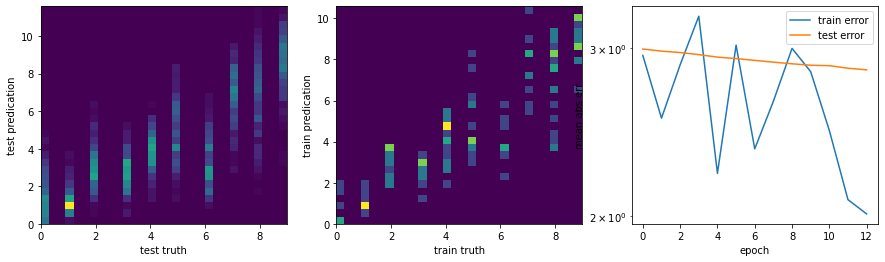

Epoch number 60
 Current loss 2.8452814724654596

Epoch number 61
 Current loss 2.835878852086257

Epoch number 62
 Current loss 2.8317377647752635



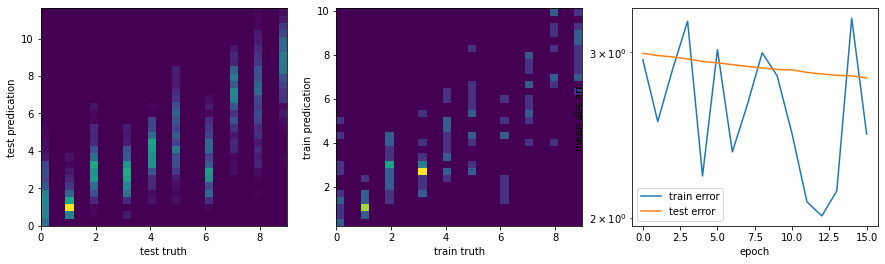

Epoch number 63
 Current loss 2.8180028163671755

Epoch number 64
 Current loss 2.809548377100663

Epoch number 65
 Current loss 2.7990878464016813



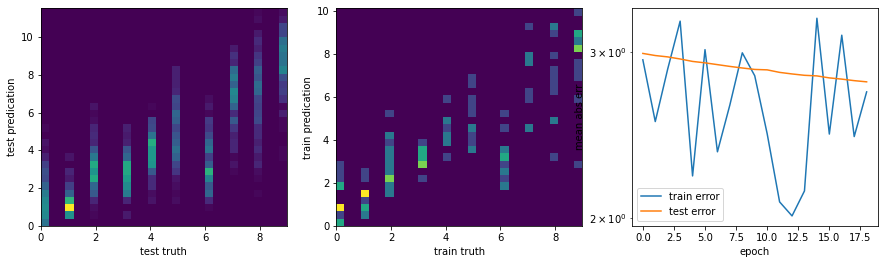

Epoch number 66
 Current loss 2.790937029576647

Epoch number 67
 Current loss 2.78326016350814



In [35]:
model.run()

## Other
    - Early stopping: there is a detection method that will stop training if th network appears to not be improving or overfitting (it will say which)
    -There are 3 other kwargs I have no mentioned: 
        -plot_ev: (int, default 3) how many epochs between plotting results
        -print_ev: (int, default 1) how many epochs between printing error,
        -train_fac: (float, default .8) fraction of the datset to be used for training
    - some kwargs can be changed in both the model initialization and as a kwarg in model.run() (so you can change mid-run). The kwargs are 'lr', 'lr_decay', 'lr_min', 'max_epochs', 'saving', 'plot_ev', 'print_ev', and 'batch_size'.